In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#let's read csv file

In [6]:
df = pd.read_csv('/content/drive/MyDrive/dataset/IRIS.csv')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.shape

(150, 5)

#Preproces data

In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
#Encod the column to use them in the model:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])


In [15]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


# Split the data into training and test sets

In [16]:
# Split the data into training and test sets

In [17]:
from sklearn.model_selection import train_test_split
#split the data

X = df.drop('species',axis=1)
y= df['species']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#Using Logistic Regressionession

In [18]:
from sklearn.linear_model import LogisticRegression
model_LogisticRegression = LogisticRegression()

In [19]:
model_LogisticRegression.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred=model_LogisticRegression.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

1.0

In [22]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

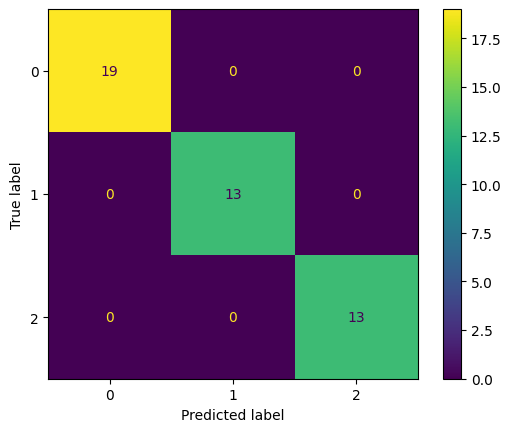

In [23]:
cm_display = ConfusionMatrixDisplay(cm).plot()

#Using Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC

model_svm = SVC()

In [25]:
model_svm.fit(X_train, y_train)

SVC()

In [26]:
# Make predictions
y_pred_svm = model_svm.predict(X_test)

In [27]:

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', accuracy_svm)

SVM Accuracy: 1.0


In [28]:
cm_SVM=confusion_matrix(y_test, y_pred_svm)
cm_SVM

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

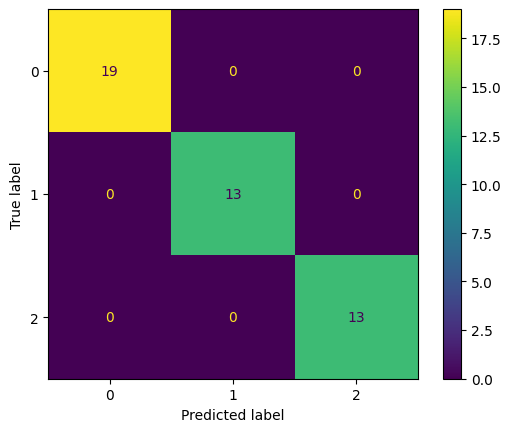

In [29]:
cm_display = ConfusionMatrixDisplay(cm_SVM).plot()

#Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

In [31]:
# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

In [32]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

Random Forest Accuracy: 1.0


In [33]:
cm_rf=confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

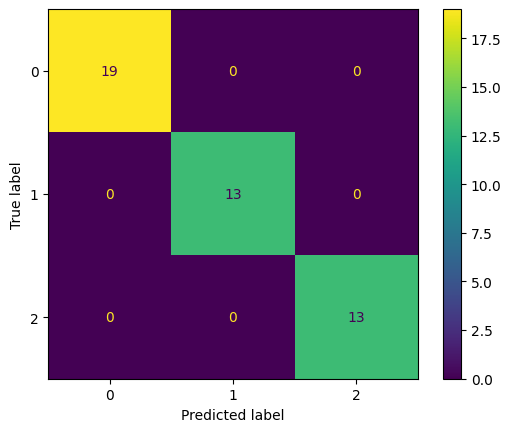

In [34]:
cm_display = ConfusionMatrixDisplay(cm_rf).plot()